In [22]:
import matplotlib.pyplot as plt                 # Importing modules that are needed
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('ECA_ex.csv')
df.head(1310)

,PersonID,age,sex,bmi,children,smoker,region,charges
0,1,19.0,female,27.900,0,yes,southwest,16884.92400
1,2,18.0,male,33.770,1,no,southeast,1725.55230
2,3,28.0,male,33.000,3,no,southeast,4449.46200
3,4,33.0,male,22.705,0,no,northwest,21984.47061
4,5,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1305,1304,43.0,male,27.800,0,yes,southwest,37829.72420
1306,1305,42.0,male,24.605,2,yes,northeast,21259.37795
1307,1306,24.0,female,27.720,0,no,southeast,2464.61880
1308,1307,29.0,female,21.850,0,yes,northeast,16115.30450


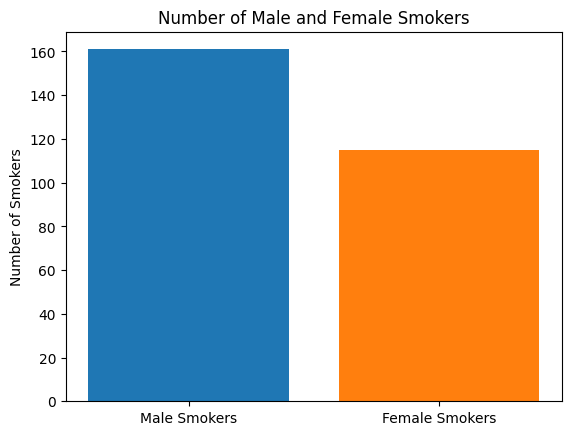

In [24]:
#Plot 1

# create a new figure
fig, ax = plt.subplots()

# count the number of male and female smokers
male_smokers = df.loc[df['sex'] == 'male', 'smoker'].value_counts()['yes']
female_smokers = df.loc[df['sex'] == 'female', 'smoker'].value_counts()['yes']

# plot the number of male and female smokers
ax.bar('Male Smokers', male_smokers)
ax.bar('Female Smokers', female_smokers)

# set the title and axis labels
ax.set_title('Number of Male and Female Smokers')
ax.set_ylabel('Number of Smokers')

# display the plot
plt.show()

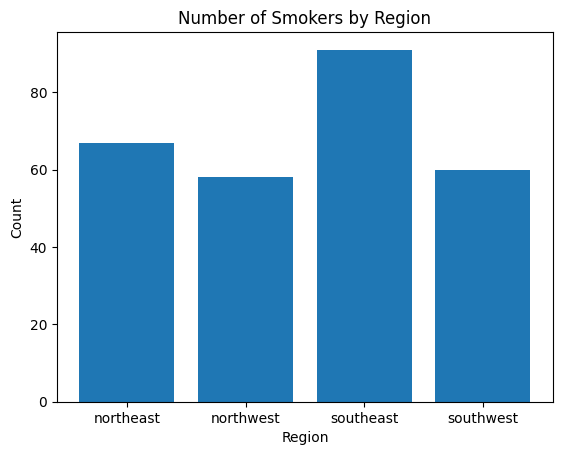

In [25]:
#Plot 2

# create a new figure
fig, ax = plt.subplots()

# count the number of smokers by region
smokers_by_region = df.groupby('region')['smoker'].apply(lambda x: (x == 'yes').sum()).reset_index(name='count')

# create a bar chart
ax.bar(smokers_by_region['region'], smokers_by_region['count'])

# set the title and axis labels
ax.set_title('Number of Smokers by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Count')

# display the plot
plt.show()

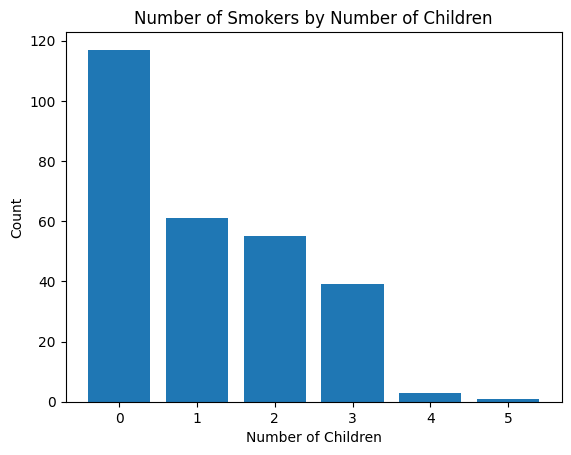

In [26]:
#Plot 3

# create a new figure
fig, ax = plt.subplots()

# count the number of smokers by number of children
smokers_by_children = df.groupby('children')['smoker'].apply(lambda x: (x == 'yes').sum()).reset_index(name='count')

# create a bar chart
ax.bar(smokers_by_children['children'], smokers_by_children['count'])

# set the title and axis labels
ax.set_title('Number of Smokers by Number of Children')
ax.set_xlabel('Number of Children')
ax.set_ylabel('Count')

# display the plot
plt.show()

In [27]:
def one_hot_encode(data):
    # Use pd.get_dummies to one-hot encode the specified columns
    encoded_data = pd.get_dummies(data, columns=['sex', 'region'])

    return encoded_data

We converted the columns of sex and region that contained strings into float values by one hot encoding. One hot encoding is an important technique in machine learning for handling categorical variables. Categorical variables are variables that take on a limited number of values, such as sex, region, or color. One hot encoding converts each categorical value into a binary vector, where each element in the vector represents a possible value of the categorical variable. This allows machine learning algorithms to work with categorical variables as if they were numerical variables, and can improve the accuracy of the model. Without one hot encoding, machine learning algorithms may interpret categorical variables as ordinal variables, which can lead to incorrect predictions.

In [28]:
#Pre-processing Task 1

encoded_df = one_hot_encode(df)

print(encoded_df)

      PersonID   age     bmi  children smoker      charges  sex_F  sex_M  \
0            1  19.0  27.900         0    yes  16884.92400      0      0   
1            2  18.0  33.770         1     no   1725.55230      0      0   
2            3  28.0  33.000         3     no   4449.46200      0      0   
3            4  33.0  22.705         0     no  21984.47061      0      0   
4            5  32.0  28.880         0     no   3866.85520      0      0   
...        ...   ...     ...       ...    ...          ...    ...    ...   
1335      1334  50.0  30.970         3     no  10600.54830      0      0   
1336      1335  18.0  31.920         0     no   2205.98080      0      0   
1337      1336  18.0  36.850         0     no   1629.83350      0      0   
1338      1337  21.0  25.800         0     no   2007.94500      0      0   
1339      1338  61.0  29.070         0    yes  29141.36030      0      0   

      sex_female  sex_male  region_northeast  region_northwest  \
0              1     

In [29]:
def one_hot_encode(data):
    # Use pd.get_dummies to one-hot encode the specified columns
    encoded_data = pd.get_dummies(data, columns=['sex', 'region'])

    return encoded_data

In [30]:
def encode_output(data):
    for i in range(len(data['smoker'])):
        if data['smoker'][i] == 'yes':
            data['smoker'][i] = 1
        else:
            data['smoker'][i] = 0
    return data

The function `encode_output()` is used to convert the output variable 'smoker' from string values ('yes' and 'no') to binary values (1 and 0). This is an important step in preparing the data for machine learning algorithms, as many algorithms require numerical inputs. By converting the output variable to binary values, we can use classification algorithms to predict whether a person is a smoker or not based on their other characteristics. This can be helpful in many applications, such as healthcare or insurance, where predicting smoking status can be important for assessing risk and making decisions.

In [31]:
#Second preprocessing task

encoded_df2 = encode_output(encoded_df)

print(encoded_df2)

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20304\2353598745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker'][i] = 1
C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20304\2353598745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker'][i] = 0


      PersonID   age     bmi  children smoker      charges  sex_F  sex_M  \
0            1  19.0  27.900         0      1  16884.92400      0      0   
1            2  18.0  33.770         1      0   1725.55230      0      0   
2            3  28.0  33.000         3      0   4449.46200      0      0   
3            4  33.0  22.705         0      0  21984.47061      0      0   
4            5  32.0  28.880         0      0   3866.85520      0      0   
...        ...   ...     ...       ...    ...          ...    ...    ...   
1335      1334  50.0  30.970         3      0  10600.54830      0      0   
1336      1335  18.0  31.920         0      0   2205.98080      0      0   
1337      1336  18.0  36.850         0      0   1629.83350      0      0   
1338      1337  21.0  25.800         0      0   2007.94500      0      0   
1339      1338  61.0  29.070         0      1  29141.36030      0      0   

      sex_female  sex_male  region_northeast  region_northwest  \
0              1     

The lines of code are performing data preprocessing by handling missing values in the dataset. The first line `encoded_df2.dropna(inplace=True)` drops all rows that contain missing values, which can help to ensure that the dataset is complete and accurate. The second line `missing_values_count = encoded_df2.isnull().sum()` calculates the number of missing values in each column of the dataset, which can help to identify which columns may need further preprocessing or imputation. The third line `missing_values_count[0:10]` prints the number of missing values in the first 10 columns of the dataset, which can help to quickly identify any columns with a large number of missing values. Overall, these lines of code are important for ensuring that the dataset is clean and ready for analysis.

In [32]:
#Third Preprocessing Task

encoded_df2.dropna(inplace=True) #Drop NA Vals
missing_values_count = encoded_df2.isnull().sum()                # Get the number of missing data points per column
missing_values_count[0:10]

PersonID      0
age           0
bmi           0
children      0
smoker        0
charges       0
sex_F         0
sex_M         0
sex_female    0
sex_male      0
dtype: int64

In [33]:
x = encoded_df2.iloc[:]
x = x.drop("smoker", axis=1)
x = x.drop("PersonID", axis=1)
x = x.astype(float)
y = encoded_df2["smoker"] 
y= y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# create a decision tree classifier
clf = DecisionTreeClassifier()

# define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score:  0.9691726143272534


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       192
           1       0.85      0.96      0.90        52

    accuracy                           0.95       244
   macro avg       0.92      0.96      0.94       244
weighted avg       0.96      0.95      0.96       244



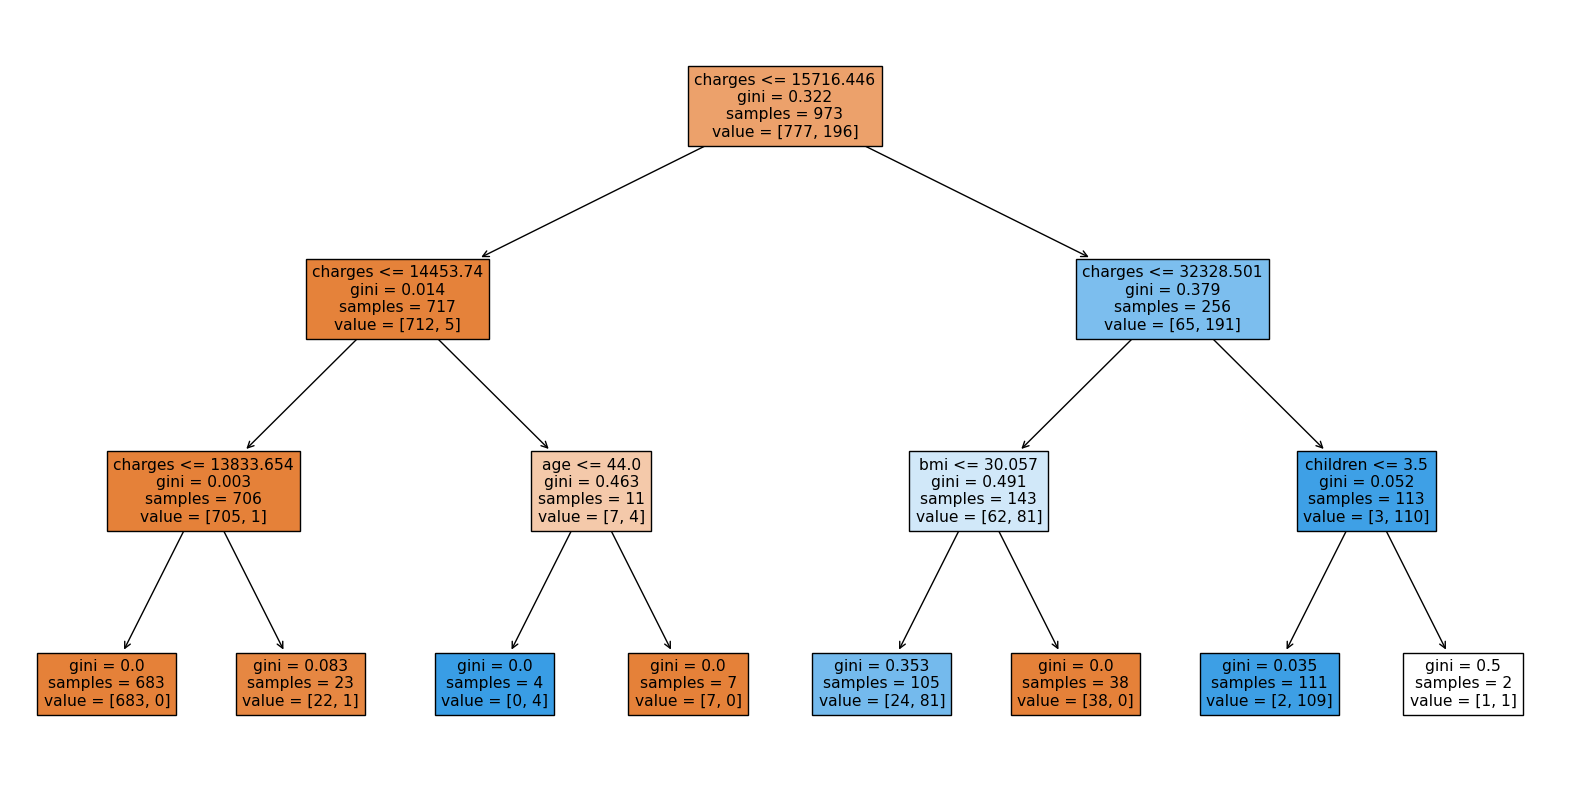

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# create a decision tree classifier
clf = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 2, min_samples_split= 2)

# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

# plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_test.columns)
plt.show()

In [ ]:
import os
import tempfile
import tensorflow as tf

tmpdir = tempfile.mkdtemp()
network_save_path = os.path.join(tmpdir, "C:/Users/Ahmad/Desktop/EM Proj/Data/BigModel/4/")
tf.keras.models.save_model(model, network_save_path)